In [1]:
from sympy import *
import numpy as np
import numpy.linalg as la

np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.2g" % x))

from matplotlib import pyplot as plt
import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

import warnings
warnings.filterwarnings("ignore")

save = r'C:\Users\reape\Desktop\Sp24\NPRE 455\hw8\\'

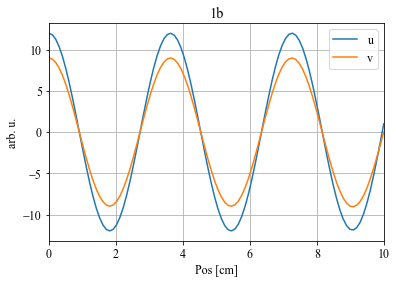

A1 (8.823259867232312e-24+0j)
A2 (8.984972558132123+0j)
A3 -1.0007610716334432e-23j
A4 (-2.2535135946476342e-08+0j)
B1 (1.1764346489643083e-23+0j)
B2 (11.979963410842831+0j)
B3 1.1764346489643083e-23j
B4 (3.004684792863511e-08+0j)


In [2]:
#1b
#Constants
gamma = 1.5
alpha = 2
l = 10

w1 = (gamma*alpha)**(.5)
w2 = (gamma*alpha)**(.5)*1j

#Matrix Definition
M = np.array([[w1**2,0,0,0,-gamma**2,0,0,0],
                 [0,w1**2,0,0,0,-gamma**2,0,0],
                 [0,0,w2**2,0,0,0,-gamma**2,0],
                 [0,0,0,w2**2,0,0,0,-gamma**2],
                 [w1,0,w2,0,0,0,0,0],
                 [0,0,0,0,w1,0,w2,0],
                 [np.sin(w1*l),np.cos(w1*l),np.sin(w2*l),np.cos(w2*l),0,0,0,0],
                 [0,0,0,0,np.sin(w1*l),np.cos(w1*l),np.sin(w2*l),np.cos(w2*l)],])
S = np.zeros(8)
S[-1] = 1

C = la.inv(M)@S
A1, A2, A3, A4, B1, B2, B3, B4 = C

#Setting functions
x = np.linspace(0,l,100)
v = A1*np.sin(w1*x) + A2*np.cos(w1*x) + A3*np.sin(w2*x) + A4*np.cos(w2*x)
u = B1*np.sin(w1*x) + B2*np.cos(w1*x) + B3*np.sin(w2*x) + B4*np.cos(w2*x)

plt.plot(x,u, label='u'), plt.plot(x,v, label='v')
plt.grid(which='both'), plt.legend()
plt.xlim(0,10), plt.title('1b')
plt.xlabel('Pos [cm]'), plt.ylabel('arb. u.')
plt.savefig(save+'1b', dpi=600)
plt.show()

print('A1',A1)
print('A2',A2)
print('A3',A3)
print('A4',A4)
print('B1',B1)
print('B2',B2)
print('B3',B3)
print('B4',B4)

In [3]:
vxx = -w1**2*(A1*np.sin(w1*x) + A2*np.cos(w1*x)) + -w2**2*(A3*np.sin(w2*x) + A4*np.cos(w2*x))
uxx = -w1**2*(B1*np.sin(w1*x) + B2*np.cos(w1*x)) + -w2**2*(B3*np.sin(w2*x) + B4*np.cos(w2*x))

print('czeching gov eqs')
display(np.real(np.round(uxx + alpha**2*v, 2)))
display(np.real(np.round(vxx + gamma**2*u, 2)))

print('Checking Edge')
display(u[-1], v[-1])

czeching gov eqs


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0, 0, 0, 0, 0, 0, -0, 0, 0, -0, -0, -0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0, 0, -0, 0, -0, 0, -0, 0, 0, 0, -0, 0, -0, 0, -0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0, 0, -0, 0, 0, -0, 0, -0, 0, 0, 0, 0, 0, -0, 0, 0, -0, -0, -0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, 0, -0, -0, -0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0, -0, -0, -0, -0, 0, -0, -0, -0, -0, -0, -0, -0, -0, 0, -0, -0, -0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, -0, 0])

Checking Edge


(1+0j)

(-5.551115123125783e-17+0j)

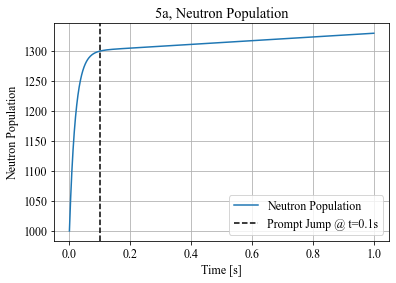

Asymptotic Period [s] 42.53564


In [8]:
#5a
#Half Life
t_half = np.array([54.51,21.84,6.00,2.23,0.496,0.179])
yields = np.array([0.038,0.213,0.188,0.407,0.128,0.026])

t_eff = np.sum(t_half*yields)

#Consants
l = 1e-4
beta = 0.00650
rho = 0.00150
k = 1/.9985
lam = np.log(2)/t_eff
Lam = l/k

w1 = (-(beta-rho+lam*Lam) + ((beta-rho+lam*Lam)**2+4*lam*Lam*rho)**(1/2))/(2*Lam)
w2 = (-(beta-rho+lam*Lam) - ((beta-rho+lam*Lam)**2+4*lam*Lam*rho)**(1/2))/(2*Lam)

#Solving Coefficients: A1, A2, F1, F2
M = np.array([[-beta/Lam,0,w1+lam,0],
             [0,-beta/Lam,0,w2+lam],
             [1,1,0,0],
             [0,0,1,1],])

S = np.zeros(4)
S[-1] = beta/Lam/lam*1000
S[-2] = 1000

A1, A2, F1, F2 = la.inv(M)@S

#Plotting
t = np.linspace(0,1,1000)
n = A1*np.exp(w1*t) + A2*np.exp(w2*t)

plt.plot(t,n, label='Neutron Population')
plt.grid(which='both')
plt.title('5a, Neutron Population')
plt.xlabel('Time [s]'), plt.ylabel('Neutron Population')
plt.axvline(.1, label='Prompt Jump @ t=0.1s', color='k', linestyle='--')
plt.legend()
plt.savefig(save+'5a', dpi=600)
plt.show()

print('Asymptotic Period [s]', round(1/w1, 5))